In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib

We'll start with the `matplotlib` library which is generally relied on as a 'base package' for other Python libraries. `matplotlib` has done most of the hardwork already, although it can feel a bit clunky and it is very much a lower level library. While you _can_ use `matplotlib` for your work, it's usually easier to use a library like `seaborn` which prettifies and simplifies `matplotlib`. Nevertheless, having a basic understanding of `matplotlib` will allow easier use of packages like `seaborn`.

## Line Graph

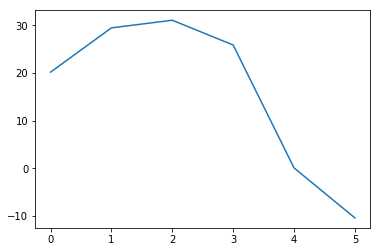

In [2]:
temps = [20.2, 29.5, 31.1, 25.9, 0.1, -10.4]
plt.plot(temps)
plt.show()

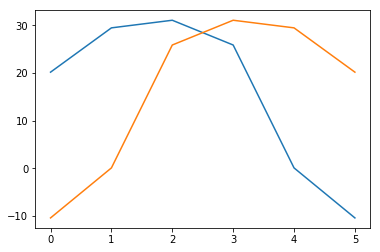

In [3]:
# multiple plots
plt.plot(temps)  # add plots
plt.plot(temps[::-1])  # add more plots on top
plt.show()

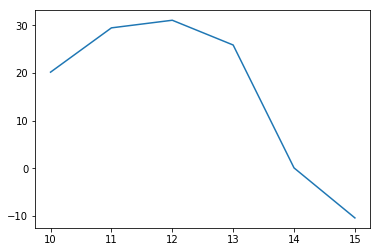

In [4]:
# specify 'x' explicitly
# plot( x , y )
plt.plot(range(10, len(temps) + 10), temps)
plt.show()

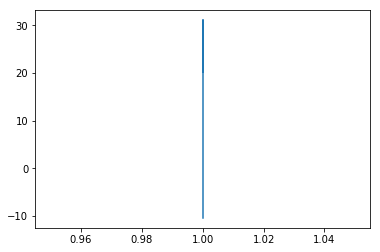

In [5]:
# specify only one value of 'x'
plt.plot([1.0] * 6, temps)
plt.show()

## Scatterplot

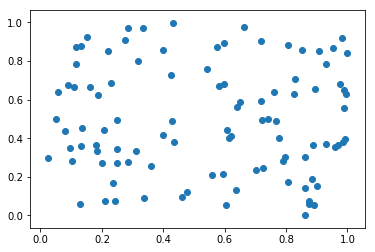

In [6]:
lst = np.random.rand(2, 100)  # 2x100 numpy array, uniform distr
plt.scatter(lst[0], lst[1])
plt.show()

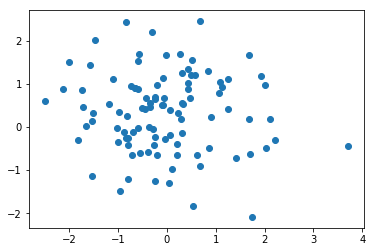

In [7]:
lst = np.random.randn(2, 100)  # 2x100 numpy array; normal distr
plt.scatter(lst[0], lst[1])
plt.show()

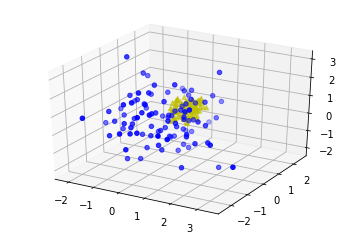

In [8]:
# just for kicks, 3d gaussian vs uniform
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lst = np.random.randn(3, 100)  # 2x100 numpy array
lst2 = np.random.rand(3, 100)
ax.scatter(lst[0], lst[1], lst[2], 
           c='b', marker='o')
ax.scatter(lst2[0], lst2[1], lst2[2], 
           c='y', marker='^')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


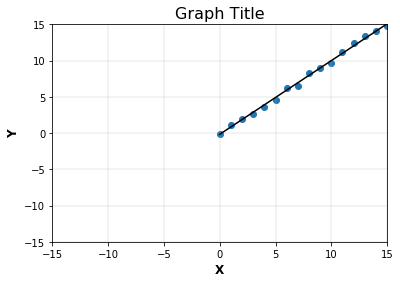

In [9]:
# start with scatter plot
# add trendline, then add labels, limits, etc.
# trendline over scatter plot
x = list(range(20))
y = x + np.random.rand(20) - 0.5
fit = np.polyfit(x, y, 1)
yfit = [n * fit[0] for n in x] + fit[1]
plt.scatter(x, y)
plt.plot(yfit, 'black')

plt.ylim(-15, 15)
plt.xlim(-15, 15)
plt.xlabel('X', size=12, fontweight='bold')
plt.ylabel('Y', size=12, fontweight='semibold')
plt.grid(True, linewidth=0.3, linestyle='-')
plt.title('Graph Title', size=16)
plt.legend()
plt.show()

## Explore pandas dataframe

In [11]:
df = pd.read_csv(r'data\oecd-meat-consumption.csv')
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,NZL,BEEF,KG_CAP,1990,26.076349
1,NZL,BEEF,KG_CAP,1991,24.033850
2,NZL,BEEF,KG_CAP,1992,24.803484
3,NZL,BEEF,KG_CAP,1993,24.152218
4,NZL,BEEF,KG_CAP,1994,21.023468


In [12]:
df['LOCATION'].value_counts(), df['SUBJECT'].value_counts(), df['MEASURE'].value_counts(),

(NZL    224
 IND    224
 USA    224
 WLD    190
 Name: LOCATION, dtype: int64, SHEEP      220
 POULTRY    220
 PIG        218
 BEEF       204
 Name: SUBJECT, dtype: int64, KG_CAP        431
 THND_TONNE    431
 Name: MEASURE, dtype: int64)

In [14]:
df_wld = df[(df['MEASURE'] == 'THND_TONNE') & (df['LOCATION'] == 'WLD')]
df_wld.sort_values('TIME', ascending=True, inplace=True)
df_wld.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LOCATION,SUBJECT,MEASURE,TIME,Value
808,WLD,POULTRY,THND_TONNE,1992,44785.792890
782,WLD,SHEEP,THND_TONNE,1992,9547.105057
711,WLD,PIG,THND_TONNE,1993,74906.787090
809,WLD,POULTRY,THND_TONNE,1993,47542.365580
783,WLD,SHEEP,THND_TONNE,1993,9885.859623


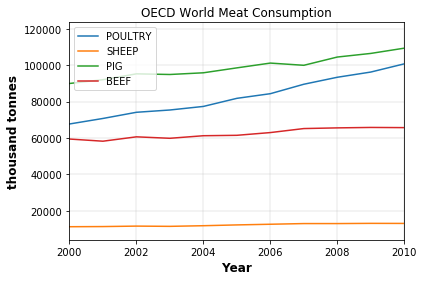

In [28]:
for label in df_wld['SUBJECT'].unique():
    plt.plot(
        df_wld[df_wld['SUBJECT'] == label]['TIME'],
        df_wld[df_wld['SUBJECT'] == label]['Value'],
        label=label
    )

plt.legend()
plt.xlabel('Year', size=12, fontweight='bold')
plt.ylabel('thousand tonnes', size=12, fontweight='semibold')
plt.grid(True, linewidth=0.3, linestyle='-')
plt.title('OECD World Meat Consumption')
plt.xlim(2000, 2010)
plt.savefig('meat-consumption.png')  # or jpg, pdf
plt.show()

## Additional Configurations

In [ ]:
%matplotlib notebook  # make graphs interactable
%matplotlib inline  # implicitly show graphs without saying 'show'

In [ ]:
import matplotlib
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['font.family'] = 'serif'

# Seaborn

* Matplotlib is relatively low-level, requiring a lot of boilerplate
* Seaborn can improve appearance with just a couple lines

In [29]:
import seaborn as sns  # sns is typical alias
sns.set()  # set rcParams and other configurations

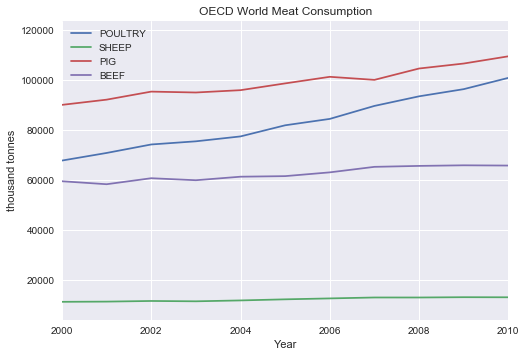

In [31]:
for label in df_wld['SUBJECT'].unique():
    plt.plot(
        df_wld[df_wld['SUBJECT'] == label]['TIME'],
        df_wld[df_wld['SUBJECT'] == label]['Value'],
        label=label
    )

plt.legend()
plt.xlabel('Year')
plt.ylabel('thousand tonnes')
plt.title('OECD World Meat Consumption')
plt.xlim(2000, 2010)
plt.show()

In [32]:
df2 = pd.read_csv(r'data\marathon-data.csv')
df2.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
age       37250 non-null int64
gender    37250 non-null object
split     37250 non-null object
final     37250 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [37]:
def convert_to_timedelta(s):
    h, m, s = map(int, s.split(':'))
    from datetime import timedelta
    return timedelta(hours=h,
                     minutes=m,
                     seconds=s)

In [39]:
df2['split'] = df2['split'].apply(convert_to_timedelta)
df2['final'] = df2['final'].apply(convert_to_timedelta)
df2['split_sec'] = df2['split'] / np.timedelta64(1, 's')
df2['final_sec'] = df2['final'] / np.timedelta64(1, 's')
df2.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


## Exploring a Graphing Library

* Go to website and check out gallery: http://seaborn.pydata.org
* Start with no parameters and add them so you can explore how they change the graph

In [41]:
%matplotlib inline

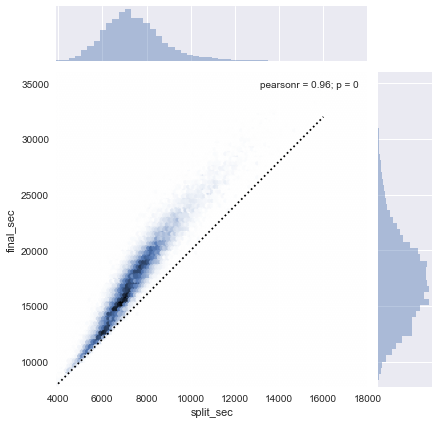

In [42]:
# let's look at time of 'split' or 'half' relative to 'final'
g = sns.jointplot("split_sec", "final_sec", df2, kind='hex')
g.ax_joint.plot(np.linspace(4000, 16000),
                np.linspace(8000, 32000), ':k')

In [43]:
# fraction to see who was faster/equally as fast in second portion of race
df2['split_frac'] = 1 - 2 * df2['split_sec'] / df2['final_sec']
df2.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


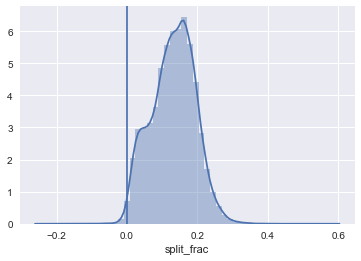

In [44]:
sns.distplot(df2['split_frac'])
plt.axvline(0)

In [45]:
# how many completed with equal halves?
sum(df2.split_frac <= 0), df2.shape[0]

(255, 37250)

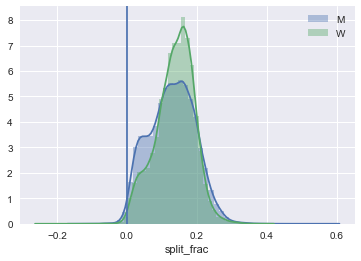

In [46]:
sns.distplot(df2[df2.gender=='M']['split_frac'], label='M')
sns.distplot(df2[df2.gender=='W']['split_frac'], label='W')
plt.legend()
plt.axvline(0)

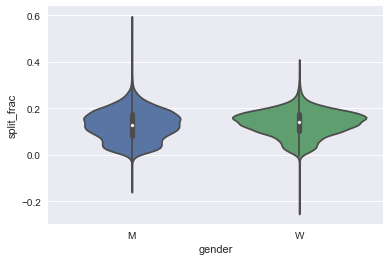

In [47]:
sns.violinplot('gender', 'split_frac', data=df2)

In [48]:
# break down by age?
df2['age_dec'] = df2['age'].apply(lambda age: 10 * (age // 10))
df2.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


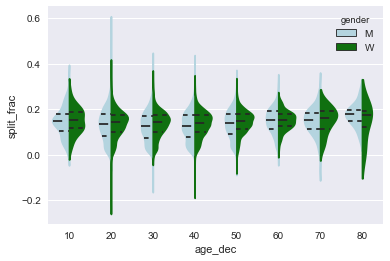

In [49]:
sns.violinplot('age_dec', 'split_frac', data=df2,
               hue='gender', split=True, inner='quartile',
               palette=['lightblue', 'green']
              )

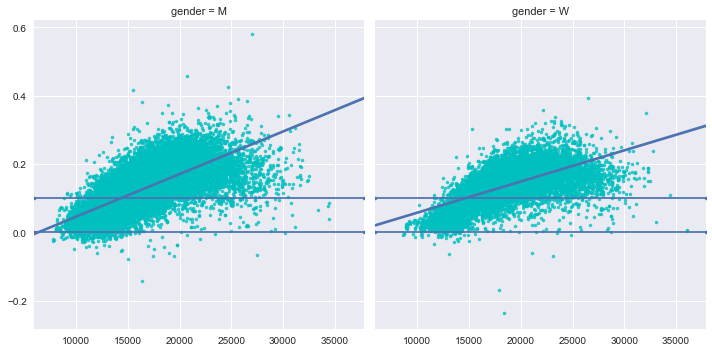

In [50]:
g = sns.lmplot('final_sec', 'split_frac', data=df2,
               col='gender', markers='.', 
               scatter_kws={'color': 'c'}
              )
g.map(plt.axhline, y=0)
g.map(plt.axhline, y=0.1)

It looks like these are some of the fast runners.